In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import signal

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv", index_col = 0)
df.head()

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = ['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis',
        'cases_primary_and_secondary_syphilis', 'year']

df = df[df['year'] >= 2002]
fips = df['fips'].unique()
print(len(fips))
print(df.dtypes)

3214
year                                                                               int64
fips                                                                               int64
cases_chlamydia                                                                  float64
cases_early_non-primary_non-secondary_syphilis                                   float64
cases_gonorrhea                                                                  float64
                                                                                  ...   
pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services    float64
pct_ind_other_services_except_public_administration                              float64
pct_ind_public_administration                                                    float64
health_insurance_rate                                                            float64
poverty_rate                                                                     float64
Length: 157, dty

In [4]:
cov = pd.read_csv("../Data/Final/STI0220_cov0220.csv")

In [5]:
cov.columns

Index(['Unnamed: 0', 'year', 'fips', 'covid_cases', 'cases_chlamydia',
       'cases_early_non-primary_non-secondary_syphilis', 'cases_gonorrhea',
       'cases_primary_and_secondary_syphilis', 'rate_per_100000_chlamydia',
       'rate_per_100000_early_non-primary_non-secondary_syphilis',
       ...
       'pct_ind_information',
       'pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing',
       'pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services',
       'pct_ind_educational_services_and_health_care_and_social_assistance',
       'pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services',
       'pct_ind_other_services_except_public_administration',
       'pct_ind_public_administration', 'health_insurance_rate',
       'poverty_rate', 'per_capita_income_2022'],
      dtype='object', length=159)

In [6]:
col_X = ['total_pop', 'pct_female',
       'pct_white', 'pct_black', 'pct_native_american', 'pct_asian',
       'pct_native_hawaiian_pacific_islander', 'pct_two_or_more_races',
       'pct_hispanic', 'unemployment_rate','poverty_rate']

In [7]:
cov = cov[(cov['year'] >= 2002) & (cov['year'] <=2019)]

In [46]:
from pmdarima.arima import auto_arima

In [9]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_chlamydia"]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc('cases_chlamydia')] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)

    # if X.isnan().sum()
    try:
        model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True,X = X)
        print(index)
    except ValueError:
        model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        print(index,"error raised")
    model.fit(df_model["cases_chlamydia"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
1001 :     315.0  &  193.11111111111106
1
1003 :     786.0  &  532.1008963206222
2
1005 :     155.0  &  133.0255827025444
3
1007 :     123.0  &  117.72049294015365
4
1009 :     168.0  &  133.62431077810936
5
1011 :     79.0  &  84.6111111111111
6
1013 :     154.0  &  105.94726758894083
7
1015 :     511.0  &  626.3888888888887
8
1017 :     160.0  &  218.99999999999994
9
1019 :     70.0  &  11.881010514275113
10
1021 :     138.0  &  89.27971025931869
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
1

In [10]:
dff = pd.DataFrame()
dff['fips'] = fips
dff['act_values_chlamydia'] = act_values
dff['pred_values_chlamydia'] = pred_values
dff['errors_chlamydia'] = errors

In [11]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia
0,1001,315.0,193.111111,121.888889
1,1003,786.0,532.100896,253.899104
2,1005,155.0,133.025583,21.974417
3,1007,123.0,117.720493,5.279507
4,1009,168.0,133.624311,34.375689


In [12]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_gonorrhea"]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc('cases_gonorrhea')] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)

    # if X.isnan().sum()
    try:
        model = auto_arima(df_model["cases_gonorrhea"], error_action='ignore', suppress_warnings=True,X = X)
        print(index)
    except:
        model = auto_arima(df_model["cases_gonorrhea"], error_action='ignore', suppress_warnings=True)
        print(index,"error raised")
        
    model.fit(df_model["cases_gonorrhea"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
1001 :     135.0  &  71.68413659950772
1
1003 :     265.0  &  160.4626959396797
2
1005 :     93.0  &  69.35295009962033
3
1007 :     82.0  &  27.77777777777777
4
1009 :     93.0  &  89.8666266524952
5
1011 :     28.0  &  30.888888888888882
6
1013 :     73.0  &  36.77810413790605
7
1015 :     276.0  &  276.5332484123528
8
1017 :     116.0  &  88.80735553370923
9
1019 :     50.0  &  16.625860659178738
10
1021 :     62.0  &  14.158729648639461
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
1

In [13]:
dff['act_values_gonorrhea'] = act_values
dff['pred_values_gonorrhea'] = pred_values
dff['errors_gonorrhea'] = errors

In [14]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea
0,1001,315.0,193.111111,121.888889,135.0,71.684137,63.315863
1,1003,786.0,532.100896,253.899104,265.0,160.462696,104.537304
2,1005,155.0,133.025583,21.974417,93.0,69.352950,23.647050
3,1007,123.0,117.720493,5.279507,82.0,27.777778,54.222222
4,1009,168.0,133.624311,34.375689,93.0,89.866627,3.133373


In [15]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_early_non-primary_non-secondary_syphilis"]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc('cases_early_non-primary_non-secondary_syphilis')] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)

    # if X.isnan().sum()
    try:
        model = auto_arima(df_model["cases_early_non-primary_non-secondary_syphilis"], error_action='ignore', suppress_warnings=True,X = X)
        print(index)
    except:
        model = auto_arima(df_model["cases_early_non-primary_non-secondary_syphilis"], error_action='ignore', suppress_warnings=True)
        print(index,"error raised")
        
    model.fit(df_model["cases_early_non-primary_non-secondary_syphilis"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
1001 :     3.0  &  1.7222222222222219
1
1003 :     7.0  &  2.888888888888889
2
1005 :     1.0  &  2.049977840555841
3
1007 :     0.0  &  -0.0003966650752379788
4
1009 :     2.0  &  0.2517380199249853
5
1011 :     2.0  &  -0.8734594732205959
6
1013 :     0.0  &  0.7777777777777776
7
1015 :     10.0  &  4.666666666666666
8
1017 :     2.0  &  2.2971151883319774
9
1019 :     1.0  &  -4.872783420163144e-06
10
1021 :     1.0  &  0.42681978798524384
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167

In [16]:
dff['act_values_early_non-primary_non-secondary_syphilis'] = act_values
dff['pred_values_early_non-primary_non-secondary_syphilis'] = pred_values
dff['errors_early_non-primary_non-secondary_syphilis'] = errors

In [17]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis
0,1001,315.0,193.111111,121.888889,135.0,71.684137,63.315863,3.0,1.722222,1.277778
1,1003,786.0,532.100896,253.899104,265.0,160.462696,104.537304,7.0,2.888889,4.111111
2,1005,155.0,133.025583,21.974417,93.0,69.352950,23.647050,1.0,2.049978,-1.049978
3,1007,123.0,117.720493,5.279507,82.0,27.777778,54.222222,0.0,-0.000397,0.000397
4,1009,168.0,133.624311,34.375689,93.0,89.866627,3.133373,2.0,0.251738,1.748262


In [18]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]

for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", "cases_primary_and_secondary_syphilis"]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc('cases_primary_and_secondary_syphilis')] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)

    # if X.isnan().sum()
    try:
        model = auto_arima(df_model["cases_primary_and_secondary_syphilis"], error_action='ignore', suppress_warnings=True,X = X)
        print(index)
    except:
        model = auto_arima(df_model["cases_primary_and_secondary_syphilis"], error_action='ignore', suppress_warnings=True)
        print(index,"error raised")
        
    model.fit(df_model["cases_primary_and_secondary_syphilis"])
    
    pred = model.predict(n_periods = 1)
    fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
1001 :     6.0  &  1.944444444444444
1
1003 :     10.0  &  4.8888888888888875
2
1005 :     2.0  &  3.421052501000423
3
1007 :     0.0  &  0.026858402519712474
4
1009 :     0.0  &  0.022254249800948287
5
1011 :     0.0  &  0.4999999979160927
6
1013 :     1.0  &  0.7229886122160605
7
1015 :     2.0  &  0.849572755869817
8
1017 :     4.0  &  3.0033778290374764
9
1019 :     0.0  &  0.1666666660239787
10
1021 :     2.0  &  0.04884275292415391
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


In [19]:
dff['act_values_primary_and_secondary_syphilis'] = act_values
dff['pred_values_primary_and_secondary_syphilis'] = pred_values
dff['errors_early_primary_and_secondary_syphilis'] = errors

In [20]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,act_values_primary_and_secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis
0,1001,315.0,193.111111,121.888889,135.0,71.684137,63.315863,3.0,1.722222,1.277778,6.0,1.944444,4.055556
1,1003,786.0,532.100896,253.899104,265.0,160.462696,104.537304,7.0,2.888889,4.111111,10.0,4.888889,5.111111
2,1005,155.0,133.025583,21.974417,93.0,69.352950,23.647050,1.0,2.049978,-1.049978,2.0,3.421053,-1.421053
3,1007,123.0,117.720493,5.279507,82.0,27.777778,54.222222,0.0,-0.000397,0.000397,0.0,0.026858,-0.026858
4,1009,168.0,133.624311,34.375689,93.0,89.866627,3.133373,2.0,0.251738,1.748262,0.0,0.022254,-0.022254


In [21]:
pop = pd.read_csv('../Data/Final/STI0220_cov0220.csv', index_col = 0).loc[:, ['total_pop', 'fips', 'year']]
pop = pop[pop['year']==2020]
dfe = pd.merge(dff, pop, on = ['fips'], how = 'outer')

In [22]:
cols2 = ['gonorrhea','chlamydia','early_non-primary_non-secondary_syphilis',
        'early_primary_and_secondary_syphilis']

for i in cols2:
    dfe['adj_errors_' + i] = dfe['errors_' + i]/dfe['total_pop']

dfe.drop(columns = 'year', inplace = True)

In [23]:
dfe.to_csv('../Data/Final/pred_vals_errors_2020_cov.csv')

### Negative binomial regression GLM

In [158]:
df = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv", index_col = 0)
df.head()

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
cols = ['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis',
        'cases_primary_and_secondary_syphilis', 'year']

df = df[df['year'] >= 2002]
fips = df['fips'].unique()
print(len(fips))
print(df.dtypes)

3214
year                                                                               int64
fips                                                                               int64
cases_chlamydia                                                                  float64
cases_early_non-primary_non-secondary_syphilis                                   float64
cases_gonorrhea                                                                  float64
                                                                                  ...   
pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services    float64
pct_ind_other_services_except_public_administration                              float64
pct_ind_public_administration                                                    float64
health_insurance_rate                                                            float64
poverty_rate                                                                     float64
Length: 157, dty

In [160]:
cov = pd.read_csv("../Data/Final/STI0220_cov0220.csv")
cov_1 = pd.read_csv("../Data/Final/STI0220_cov0220.csv")

In [161]:
cov.columns

Index(['Unnamed: 0', 'year', 'fips', 'covid_cases', 'cases_chlamydia',
       'cases_early_non-primary_non-secondary_syphilis', 'cases_gonorrhea',
       'cases_primary_and_secondary_syphilis', 'rate_per_100000_chlamydia',
       'rate_per_100000_early_non-primary_non-secondary_syphilis',
       ...
       'pct_ind_information',
       'pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing',
       'pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services',
       'pct_ind_educational_services_and_health_care_and_social_assistance',
       'pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services',
       'pct_ind_other_services_except_public_administration',
       'pct_ind_public_administration', 'health_insurance_rate',
       'poverty_rate', 'per_capita_income_2022'],
      dtype='object', length=159)

In [162]:
col_X = ['pct_female',
       'pct_white', 'pct_black', 'pct_native_american', 'pct_asian',
       'pct_native_hawaiian_pacific_islander', 'pct_two_or_more_races',
       'pct_hispanic', 'unemployment_rate','poverty_rate']

In [163]:
cov = cov[(cov['year'] >= 2002) & (cov['year'] <=2019) ]

In [164]:
cov[col_X]

,pct_female,pct_white,pct_black,pct_native_american,pct_asian,pct_native_hawaiian_pacific_islander,pct_two_or_more_races,pct_hispanic,unemployment_rate
3142,0.512906,0.807445,0.172123,0.004792,0.006055,0.000283,0.009301,0.016119,4.8
3143,0.510675,0.877917,0.101624,0.006252,0.004549,0.000331,0.009327,0.021952,5.0
3144,0.479287,0.516316,0.468851,0.004816,0.003316,0.000384,0.006317,0.024116,7.7
3145,0.486721,0.771310,0.220341,0.002547,0.000755,0.000142,0.004906,0.012265,7.0
3146,0.501912,0.969515,0.014690,0.005557,0.001770,0.000247,0.008221,0.058039,5.4
...,...,...,...,...,...,...,...,...,...
61213,0.477710,0.729021,0.001311,0.159091,0.007430,0.001311,0.101836,0.012238,NaN
61214,0.479547,0.731506,0.001305,0.157093,0.013490,0.000435,0.096171,0.014795,NaN
61215,0.484192,0.731052,0.001299,0.153746,0.013426,0.000433,0.100043,0.015158,NaN
61216,0.478036,0.738587,0.001292,0.155469,0.012920,0.000431,0.091301,0.014643,NaN


In [165]:
import statsmodels.api as sm

In [166]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_chlamydia"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        model = sm.GLM(list(df_model[col_str]), X, family=sm.families.NegativeBinomial())
        # print("Nothing")
        res = model.fit()
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = res.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        # print(fitted_value.tolist())
        # print(type(fitted_value))
        fitted_value = fitted_value.tolist()[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
270.92277106444845
1001 :     315.0  &  270.92277106444845
1
485.6607925317694
1003 :     786.0  &  485.6607925317694
2
285.5955172057444
1005 :     155.0  &  285.5955172057444
3
351.8994663628786
1007 :     123.0  &  351.8994663628786
4
41.99675406823257
1009 :     168.0  &  41.99675406823257
5
21.5547430604807
1011 :     79.0  &  21.5547430604807
6
171.4366957844171
1013 :     154.0  &  171.4366957844171
7
998.3796458030132
1015 :     511.0  &  998.3796458030132
8
416.79791924015933
1017 :     160.0  &  416.79791924015933
9
245.7244964207926
1019 :     70.0  &  245.7244964207926
10
370.01487624698683
1021 :     138.0  &  370.01487624698683
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


In [167]:
dff = pd.DataFrame()
dff['fips'] = fips
dff['act_values_chlamydia'] = act_values
dff['pred_values_chlamydia'] = pred_values
dff['errors_chlamydia'] = errors

In [168]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia
0,1001,315.0,270.922771,44.077229
1,1003,786.0,485.660793,300.339207
2,1005,155.0,285.595517,-130.595517
3,1007,123.0,351.899466,-228.899466
4,1009,168.0,41.996754,126.003246


In [169]:
dff.isna().sum()

fips                      0
act_values_chlamydia      0
pred_values_chlamydia    99
errors_chlamydia         99
dtype: int64

In [170]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_gonorrhea"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        model = sm.GLM(list(df_model[col_str]), X, family=sm.families.NegativeBinomial())
        # print("Nothing")
        res = model.fit()
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = res.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        # print(fitted_value.tolist())
        # print(type(fitted_value))
        fitted_value = fitted_value.tolist()[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
194.9407349622456
1001 :     135.0  &  194.9407349622456
1
103.93161347283754
1003 :     265.0  &  103.93161347283754
2
236.85851319000463
1005 :     93.0  &  236.85851319000463
3
44.028790793804184
1007 :     82.0  &  44.028790793804184
4
0.6412416177418263
1009 :     93.0  &  0.6412416177418263
5
2.84399651642907
1011 :     28.0  &  2.84399651642907
6
2.5233531432848806
1013 :     73.0  &  2.5233531432848806
7
201.40625122651215
1015 :     276.0  &  201.40625122651215
8
183.04109222549508
1017 :     116.0  &  183.04109222549508
9
277.3243312138574
1019 :     50.0  &  277.3243312138574
10
243.52126702735464
1021 :     62.0  &  243.52126702735464
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75 error raised
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88
89 error raised
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
1

In [171]:
dff['act_values_gonorrhea'] = act_values
dff['pred_values_gonorrhea'] = pred_values
dff['errors_gonorrhea'] = errors

In [172]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea
0,1001,315.0,270.922771,44.077229,135.0,194.940735,-59.940735
1,1003,786.0,485.660793,300.339207,265.0,103.931613,161.068387
2,1005,155.0,285.595517,-130.595517,93.0,236.858513,-143.858513
3,1007,123.0,351.899466,-228.899466,82.0,44.028791,37.971209
4,1009,168.0,41.996754,126.003246,93.0,0.641242,92.358758


In [173]:
dff.isna().sum()

fips                       0
act_values_chlamydia       0
pred_values_chlamydia     99
errors_chlamydia          99
act_values_gonorrhea       0
pred_values_gonorrhea    286
errors_gonorrhea         286
dtype: int64

In [174]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_early_non-primary_non-secondary_syphilis"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        model = sm.GLM(list(df_model[col_str]), X, family=sm.families.NegativeBinomial())
        # print("Nothing")
        res = model.fit()
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = res.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        # print(fitted_value.tolist())
        # print(type(fitted_value))
        fitted_value = fitted_value.tolist()[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
125.9641197600562
1001 :     3.0  &  125.9641197600562
1
1.917712790503124
1003 :     7.0  &  1.917712790503124
2
35450.909998910705
1005 :     1.0  &  35450.909998910705
3
1.0728743059560224
1007 :     0.0  &  1.0728743059560224
4
61.02937473729303
1009 :     2.0  &  61.02937473729303
5
2.681313724669962e+210
1011 :     2.0  &  2.681313724669962e+210
6
0.19051797122159347
1013 :     0.0  &  0.19051797122159347
7
0.6257406289039381
1015 :     10.0  &  0.6257406289039381
8
0.7271918579417954
1017 :     2.0  &  0.7271918579417954
9 error raised
nan
1019 :     1.0  &  nan
10
60.292792301685225
1021 :     1.0  &  60.292792301685225
11 error raised
12
13
14 error raised
15
16
17
18 error raised
19
20
21
22
23
24
25
26
27
28
29 error raised
30 error raised
31
32
33
34
35
36
37 error raised
38
39
40
41
42
43
44
45
46 error raised
47
48
49 error raised
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64 error raised
65
66 error raised
67 error raised
68 error raised
69
70 error raised
71 error rais

In [175]:
dff['act_values_early_non-primary_non-secondary_syphilis'] = act_values
dff['pred_values_early_non-primary_non-secondary_syphilis'] = pred_values
dff['errors_early_non-primary_non-secondary_syphilis'] = errors

In [176]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis
0,1001,315.0,270.922771,44.077229,135.0,194.940735,-59.940735,3.0,125.964120,-122.964120
1,1003,786.0,485.660793,300.339207,265.0,103.931613,161.068387,7.0,1.917713,5.082287
2,1005,155.0,285.595517,-130.595517,93.0,236.858513,-143.858513,1.0,35450.909999,-35449.909999
3,1007,123.0,351.899466,-228.899466,82.0,44.028791,37.971209,0.0,1.072874,-1.072874
4,1009,168.0,41.996754,126.003246,93.0,0.641242,92.358758,2.0,61.029375,-59.029375


In [177]:
dff.isna().sum()

fips                                                       0
act_values_chlamydia                                       0
pred_values_chlamydia                                     99
errors_chlamydia                                          99
act_values_gonorrhea                                       0
pred_values_gonorrhea                                    286
errors_gonorrhea                                         286
act_values_early_non-primary_non-secondary_syphilis        0
pred_values_early_non-primary_non-secondary_syphilis    1894
errors_early_non-primary_non-secondary_syphilis         1894
dtype: int64

In [178]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_primary_and_secondary_syphilis"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        model = sm.GLM(list(df_model[col_str]), X, family=sm.families.NegativeBinomial())
        # print("Nothing")
        res = model.fit()
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = res.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        # print(fitted_value.tolist())
        # print(type(fitted_value))
        fitted_value = fitted_value.tolist()[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
18.238389286986706
1001 :     6.0  &  18.238389286986706
1
76.08117558162876
1003 :     10.0  &  76.08117558162876
2
2685.1205332201935
1005 :     2.0  &  2685.1205332201935
3 error raised
nan
1007 :     0.0  &  nan
4
0.0035214344733273156
1009 :     0.0  &  0.0035214344733273156
5 error raised
nan
1011 :     0.0  &  nan
6
0.01947819125990591
1013 :     1.0  &  0.01947819125990591
7
0.2237221934487483
1015 :     2.0  &  0.2237221934487483
8
6.198671553796717
1017 :     4.0  &  6.198671553796717
9 error raised
nan
1019 :     0.0  &  nan
10
49600005.94475621
1021 :     2.0  &  49600005.94475621
11
12 error raised
13 error raised
14 error raised
15
16
17
18 error raised
19
20
21
22
23
24 error raised
25
26
27
28 error raised
29
30
31
32
33
34
35
36
37 error raised
38
39
40
41
42
43
44
45
46 error raised
47
48
49
50
51
52 error raised
53
54
55 error raised
56
57
58
59 error raised
60
61
62
63
64 error raised
65
66 error raised
67 error raised
68 error raised
69
70 error raised
71 error r

In [179]:
dff['act_values_primary_and_secondary_syphilis'] = act_values
dff['pred_values_primary_and_secondary_syphilis'] = pred_values
dff['errors_early_primary_and_secondary_syphilis'] = errors

In [180]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,act_values_primary_and_secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis
0,1001,315.0,270.922771,44.077229,135.0,194.940735,-59.940735,3.0,125.964120,-122.964120,6.0,18.238389,-12.238389
1,1003,786.0,485.660793,300.339207,265.0,103.931613,161.068387,7.0,1.917713,5.082287,10.0,76.081176,-66.081176
2,1005,155.0,285.595517,-130.595517,93.0,236.858513,-143.858513,1.0,35450.909999,-35449.909999,2.0,2685.120533,-2683.120533
3,1007,123.0,351.899466,-228.899466,82.0,44.028791,37.971209,0.0,1.072874,-1.072874,0.0,NaN,NaN
4,1009,168.0,41.996754,126.003246,93.0,0.641242,92.358758,2.0,61.029375,-59.029375,0.0,0.003521,-0.003521


In [181]:
dff.isna().sum()

fips                                                       0
act_values_chlamydia                                       0
pred_values_chlamydia                                     99
errors_chlamydia                                          99
act_values_gonorrhea                                       0
pred_values_gonorrhea                                    286
errors_gonorrhea                                         286
act_values_early_non-primary_non-secondary_syphilis        0
pred_values_early_non-primary_non-secondary_syphilis    1894
errors_early_non-primary_non-secondary_syphilis         1894
act_values_primary_and_secondary_syphilis                  0
pred_values_primary_and_secondary_syphilis              1857
errors_early_primary_and_secondary_syphilis             1857
dtype: int64

In [182]:
df["cases_chlamydia"].isna().sum()

0

In [183]:
dff["errors_chlamydia"].sum()

-8.501661569025346e+103

In [184]:
dff["errors_gonorrhea"].sum()

-6.173334311282217e+34

### Random Forest

In [6]:
df = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv", index_col = 0)
df.head()

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols = ['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis',
        'cases_primary_and_secondary_syphilis', 'year']

df = df[df['year'] >= 2002]
fips = df['fips'].unique()
print(len(fips))
print(df.dtypes)

3214
year                                                                               int64
fips                                                                               int64
cases_chlamydia                                                                  float64
cases_early_non-primary_non-secondary_syphilis                                   float64
cases_gonorrhea                                                                  float64
                                                                                  ...   
pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services    float64
pct_ind_other_services_except_public_administration                              float64
pct_ind_public_administration                                                    float64
health_insurance_rate                                                            float64
poverty_rate                                                                     float64
Length: 157, dty

In [8]:
cov = pd.read_csv("../Data/Final/STI0220_cov0220.csv")
cov_1 = pd.read_csv("../Data/Final/STI0220_cov0220.csv")

In [9]:
cov.columns

Index(['Unnamed: 0', 'year', 'fips', 'covid_cases', 'cases_chlamydia',
       'cases_early_non-primary_non-secondary_syphilis', 'cases_gonorrhea',
       'cases_primary_and_secondary_syphilis', 'rate_per_100000_chlamydia',
       'rate_per_100000_early_non-primary_non-secondary_syphilis',
       ...
       'pct_ind_information',
       'pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing',
       'pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services',
       'pct_ind_educational_services_and_health_care_and_social_assistance',
       'pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services',
       'pct_ind_other_services_except_public_administration',
       'pct_ind_public_administration', 'health_insurance_rate',
       'poverty_rate', 'per_capita_income_2022'],
      dtype='object', length=159)

In [10]:
col_X = ['year','pct_female',
       'pct_white', 'pct_black', 'pct_native_american', 'pct_asian',
       'pct_native_hawaiian_pacific_islander', 'pct_two_or_more_races',
       'pct_hispanic', 'unemployment_rate','poverty_rate']

In [11]:
cov = cov[(cov['year'] >= 2002) & (cov['year'] <=2019) ]

In [12]:
cov[col_X]

,year,pct_female,pct_white,pct_black,pct_native_american,pct_asian,pct_native_hawaiian_pacific_islander,pct_two_or_more_races,pct_hispanic,unemployment_rate,poverty_rate
3142,2002,0.512906,0.807445,0.172123,0.004792,0.006055,0.000283,0.009301,0.016119,4.8,10.3
3143,2002,0.510675,0.877917,0.101624,0.006252,0.004549,0.000331,0.009327,0.021952,5.0,10.7
3144,2002,0.479287,0.516316,0.468851,0.004816,0.003316,0.000384,0.006317,0.024116,7.7,23.6
3145,2002,0.486721,0.771310,0.220341,0.002547,0.000755,0.000142,0.004906,0.012265,7.0,17.7
3146,2002,0.501912,0.969515,0.014690,0.005557,0.001770,0.000247,0.008221,0.058039,5.4,12.6
...,...,...,...,...,...,...,...,...,...,...,...
61213,2004,0.477710,0.729021,0.001311,0.159091,0.007430,0.001311,0.101836,0.012238,NaN,NaN
61214,2005,0.479547,0.731506,0.001305,0.157093,0.013490,0.000435,0.096171,0.014795,NaN,NaN
61215,2006,0.484192,0.731052,0.001299,0.153746,0.013426,0.000433,0.100043,0.015158,NaN,NaN
61216,2007,0.478036,0.738587,0.001292,0.155469,0.012920,0.000431,0.091301,0.014643,NaN,NaN


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_chlamydia"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # print("Nothing")
        rf.fit(X,list(df_model[col_str]))
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = rf.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
298.512
1001 :     315.0  &  298.512
1
632.778
1003 :     786.0  &  632.778
2
194.493
1005 :     155.0  &  194.493
3
117.564
1007 :     123.0  &  117.564
4
179.954
1009 :     168.0  &  179.954
5
110.931
1011 :     79.0  &  110.931
6
181.007
1013 :     154.0  &  181.007
7
708.171
1015 :     511.0  &  708.171
8
232.822
1017 :     160.0  &  232.822
9
74.665
1019 :     70.0  &  74.665
10
136.074
1021 :     138.0  &  136.074
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88 error raised
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
1

In [15]:
dff = pd.DataFrame()
dff['fips'] = fips
dff['act_values_chlamydia'] = act_values
dff['pred_values_chlamydia'] = pred_values
dff['errors_chlamydia'] = errors

In [16]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia
0,1001,315.0,298.512,16.488
1,1003,786.0,632.778,153.222
2,1005,155.0,194.493,-39.493
3,1007,123.0,117.564,5.436
4,1009,168.0,179.954,-11.954


In [17]:
dff.isna().sum()

fips                      0
act_values_chlamydia      0
pred_values_chlamydia    91
errors_chlamydia         91
dtype: int64

In [18]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_gonorrhea"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    #     # print("Nothing")
    # rf.fit(list(df_model[col_str]), X)
    # # print("Nothing")
    # # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
    # fitted_value = rf.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
    # print(fitted_value)
    # print(type(fitted_value))
    # if X.isnan().sum()
    try:
        # model = sm.GLM(list(df_model[col_str]), X, family=sm.families.NegativeBinomial())
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # print("Nothing")
        rf.fit(X,list(df_model[col_str]))
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = rf.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])[0]
        # print(fitted_value)
        # print(type(fitted_value))
        # fitted_value = fitted_value.tolist()[0]
        # Import the model we are using

# Instantiate model with 1000 decision trees
        
        # Train the model on training data
        # rf.fit(train_features, train_labels);
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
108.248
1001 :     135.0  &  108.248
1
199.273
1003 :     265.0  &  199.273
2
137.519
1005 :     93.0  &  137.519
3
53.689
1007 :     82.0  &  53.689
4
66.164
1009 :     93.0  &  66.164
5
45.11
1011 :     28.0  &  45.11
6
57.433
1013 :     73.0  &  57.433
7
334.602
1015 :     276.0  &  334.602
8
102.7
1017 :     116.0  &  102.7
9
32.02
1019 :     50.0  &  32.02
10
62.697
1021 :     62.0  &  62.697
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88 error raised
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175


In [19]:
dff['act_values_gonorrhea'] = act_values
dff['pred_values_gonorrhea'] = pred_values
dff['errors_gonorrhea'] = errors

In [20]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea
0,1001,315.0,298.512,16.488,135.0,108.248,26.752
1,1003,786.0,632.778,153.222,265.0,199.273,65.727
2,1005,155.0,194.493,-39.493,93.0,137.519,-44.519
3,1007,123.0,117.564,5.436,82.0,53.689,28.311
4,1009,168.0,179.954,-11.954,93.0,66.164,26.836


In [21]:
dff.isna().sum()

fips                      0
act_values_chlamydia      0
pred_values_chlamydia    91
errors_chlamydia         91
act_values_gonorrhea      0
pred_values_gonorrhea    91
errors_gonorrhea         91
dtype: int64

In [22]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_early_non-primary_non-secondary_syphilis"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # print("Nothing")
        rf.fit(X,list(df_model[col_str]))
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = rf.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
3.927
1001 :     3.0  &  3.927
1
3.483
1003 :     7.0  &  3.483
2
3.375
1005 :     1.0  &  3.375
3
0.273
1007 :     0.0  &  0.273
4
0.81
1009 :     2.0  &  0.81
5
0.942
1011 :     2.0  &  0.942
6
0.737
1013 :     0.0  &  0.737
7
6.387
1015 :     10.0  &  6.387
8
3.135
1017 :     2.0  &  3.135
9
0.343
1019 :     1.0  &  0.343
10
1.076
1021 :     1.0  &  1.076
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88 error raised
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185


In [23]:
dff['act_values_early_non-primary_non-secondary_syphilis'] = act_values
dff['pred_values_early_non-primary_non-secondary_syphilis'] = pred_values
dff['errors_early_non-primary_non-secondary_syphilis'] = errors

In [24]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis
0,1001,315.0,298.512,16.488,135.0,108.248,26.752,3.0,3.927,-0.927
1,1003,786.0,632.778,153.222,265.0,199.273,65.727,7.0,3.483,3.517
2,1005,155.0,194.493,-39.493,93.0,137.519,-44.519,1.0,3.375,-2.375
3,1007,123.0,117.564,5.436,82.0,53.689,28.311,0.0,0.273,-0.273
4,1009,168.0,179.954,-11.954,93.0,66.164,26.836,2.0,0.810,1.190


In [25]:
dff.isna().sum()

fips                                                     0
act_values_chlamydia                                     0
pred_values_chlamydia                                   91
errors_chlamydia                                        91
act_values_gonorrhea                                     0
pred_values_gonorrhea                                   91
errors_gonorrhea                                        91
act_values_early_non-primary_non-secondary_syphilis      0
pred_values_early_non-primary_non-secondary_syphilis    91
errors_early_non-primary_non-secondary_syphilis         91
dtype: int64

In [26]:
act_values = []
pred_values = []
errors = []

#fips = fips[:500]
col_str = "cases_primary_and_secondary_syphilis"
for index, i in enumerate(fips):
    X = cov[(cov['fips'] == i)]
    X = X[col_X]
    # print(X.isnull().values.any())
    df1 = df[(df['fips']==i) & (df['year']>= 2002)].loc[:,cols]
    df_sum = df1.groupby('year').sum().reset_index()
    df_model = df_sum[["year", col_str]]
    #print(df_model.shape)

    #df_model['cases_chlamydia'] = signal.detrend(df_model.cases_chlamydia)
    actual_value = df_model.iloc[-1, df_model.columns.get_loc(col_str)] 
    df_model = df_model[(df_model["year"] <= 2019)]
    df_plot = df_model
    #print(df_model.head(20))
    #print(actual_value)
    # print(X.shape)
    # print(df_model["cases_chlamydia"].shape)
    # model = sm.GLM(list(df_model["cases_chlamydia"]), X, family=sm.families.Poisson())
    # if X.isnan().sum()
    try:
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
        # print("Nothing")
        rf.fit(X,list(df_model[col_str]))
        # print("Nothing")
        # print(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])
        fitted_value = rf.predict(cov_1[(cov_1['fips'] == i) & (cov_1['year']==2020)].loc[:,col_X])[0]
        print(index)
    except :
        # print("Nothing")
        # model = auto_arima(df_model["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        fitted_value = np.nan 
        print(index,"error raised")
    # model.fit(df_model["cases_chlamydia"])
    
    # pred = model.predict(n_periods = 1)
    # fitted_value = pred[0]
    #print(df['year'].nunique())
    
    act_values.append(actual_value)
    pred_values.append(fitted_value)
    errors.append(actual_value - fitted_value)
    # print(index)
    
    #print(model_fit.summary())
    if index <= 10:
        print(fitted_value)
        print(i , ':    ', actual_value, ' & ', fitted_value)
        
    #print(model_fit.resid)
    #print(i , ':    ', fitted_value)
    #print(df_plot.head(20))
    #print(df_model.head(20))

0
2.802
1001 :     6.0  &  2.802
1
10.128
1003 :     10.0  &  10.128
2
4.966
1005 :     2.0  &  4.966
3
1.347
1007 :     0.0  &  1.347
4
1.033
1009 :     0.0  &  1.033
5
0.82
1011 :     0.0  &  0.82
6
1.667
1013 :     1.0  &  1.667
7
1.485
1015 :     2.0  &  1.485
8
4.697
1017 :     4.0  &  4.697
9
0.12
1019 :     0.0  &  0.12
10
1.241
1021 :     2.0  &  1.241
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85 error raised
86
87
88 error raised
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185


In [27]:
dff['act_values_primary_and_secondary_syphilis'] = act_values
dff['pred_values_primary_and_secondary_syphilis'] = pred_values
dff['errors_early_primary_and_secondary_syphilis'] = errors

In [28]:
dff.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,act_values_primary_and_secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis
0,1001,315.0,298.512,16.488,135.0,108.248,26.752,3.0,3.927,-0.927,6.0,2.802,3.198
1,1003,786.0,632.778,153.222,265.0,199.273,65.727,7.0,3.483,3.517,10.0,10.128,-0.128
2,1005,155.0,194.493,-39.493,93.0,137.519,-44.519,1.0,3.375,-2.375,2.0,4.966,-2.966
3,1007,123.0,117.564,5.436,82.0,53.689,28.311,0.0,0.273,-0.273,0.0,1.347,-1.347
4,1009,168.0,179.954,-11.954,93.0,66.164,26.836,2.0,0.810,1.190,0.0,1.033,-1.033


In [29]:
dff.isna().sum()

fips                                                     0
act_values_chlamydia                                     0
pred_values_chlamydia                                   91
errors_chlamydia                                        91
act_values_gonorrhea                                     0
pred_values_gonorrhea                                   91
errors_gonorrhea                                        91
act_values_early_non-primary_non-secondary_syphilis      0
pred_values_early_non-primary_non-secondary_syphilis    91
errors_early_non-primary_non-secondary_syphilis         91
act_values_primary_and_secondary_syphilis                0
pred_values_primary_and_secondary_syphilis              91
errors_early_primary_and_secondary_syphilis             91
dtype: int64

In [30]:
df["cases_chlamydia"].isna().sum()

0

In [31]:
dff["errors_chlamydia"].sum()

-153066.08399999997

In [32]:
dff["errors_gonorrhea"].sum()

101946.06850000001

In [33]:
pop = pd.read_csv('../Data/Final/STI0220_cov0220.csv', index_col = 0).loc[:, ['total_pop', 'fips', 'year']]
pop = pop[pop['year']==2020]
dfe = pd.merge(dff, pop, on = ['fips'], how = 'outer')

In [34]:
cols2 = ['gonorrhea','chlamydia','early_non-primary_non-secondary_syphilis',
        'early_primary_and_secondary_syphilis']

for i in cols2:
    dfe['adj_errors_' + i] = dfe['errors_' + i]/dfe['total_pop']

dfe.drop(columns = 'year', inplace = True)

In [35]:
dfe.to_csv('../Data/Final/pred_vals_errors_2020_cov_random_forest.csv')

In [36]:
dfe.head()

,fips,act_values_chlamydia,pred_values_chlamydia,errors_chlamydia,act_values_gonorrhea,pred_values_gonorrhea,errors_gonorrhea,act_values_early_non-primary_non-secondary_syphilis,pred_values_early_non-primary_non-secondary_syphilis,errors_early_non-primary_non-secondary_syphilis,act_values_primary_and_secondary_syphilis,pred_values_primary_and_secondary_syphilis,errors_early_primary_and_secondary_syphilis,total_pop,adj_errors_gonorrhea,adj_errors_chlamydia,adj_errors_early_non-primary_non-secondary_syphilis,adj_errors_early_primary_and_secondary_syphilis
0,1001,315.0,298.512,16.488,135.0,108.248,26.752,3.0,3.927,-0.927,6.0,2.802,3.198,55639.0,0.000481,0.000296,-0.000017,5.747767e-05
1,1003,786.0,632.778,153.222,265.0,199.273,65.727,7.0,3.483,3.517,10.0,10.128,-0.128,218289.0,0.000301,0.000702,0.000016,-5.863786e-07
2,1005,155.0,194.493,-39.493,93.0,137.519,-44.519,1.0,3.375,-2.375,2.0,4.966,-2.966,25026.0,-0.001779,-0.001578,-0.000095,-1.185167e-04
3,1007,123.0,117.564,5.436,82.0,53.689,28.311,0.0,0.273,-0.273,0.0,1.347,-1.347,22374.0,0.001265,0.000243,-0.000012,-6.020381e-05
4,1009,168.0,179.954,-11.954,93.0,66.164,26.836,2.0,0.810,1.190,0.0,1.033,-1.033,57755.0,0.000465,-0.000207,0.000021,-1.788590e-05


In [38]:
dfe.errors_gonorrhea.sum()

101946.06850000001

### County arima 

In [39]:
df = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv", index_col = 0)
df.head() 

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate,covid_cases
0,2002,1001,72.0,4.0,54.0,3.0,159.3,8.8,119.5,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,1003,244.0,0.0,120.0,0.0,164.7,0.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,1005,114.0,0.0,90.0,0.0,389.3,0.0,307.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,1007,61.0,0.0,30.0,0.0,291.8,0.0,143.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,1009,38.0,1.0,7.0,0.0,72.0,1.9,13.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FIPS:	 1001


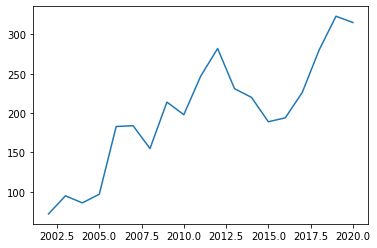

FIPS:	 1003


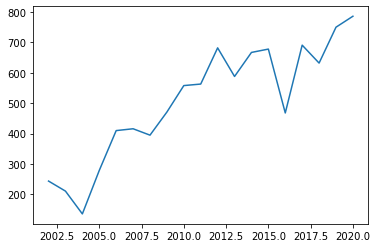

FIPS:	 1005


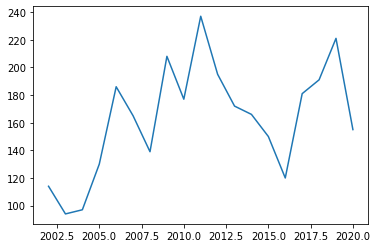

FIPS:	 1007


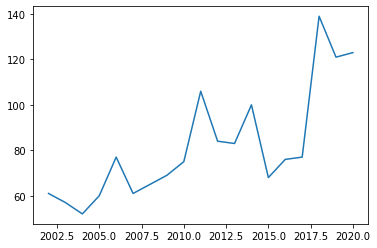

FIPS:	 1009


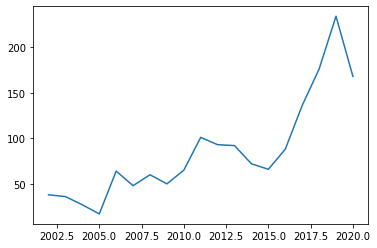

FIPS:	 1011


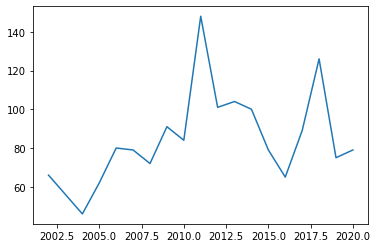

FIPS:	 1013


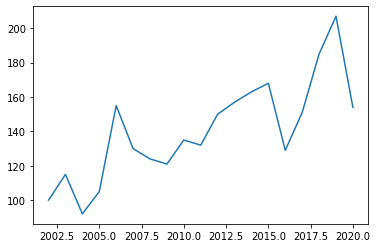

FIPS:	 1015


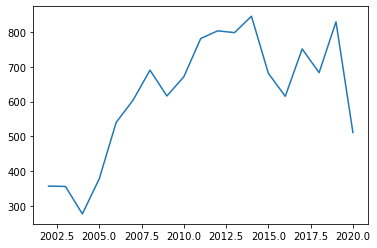

FIPS:	 1017


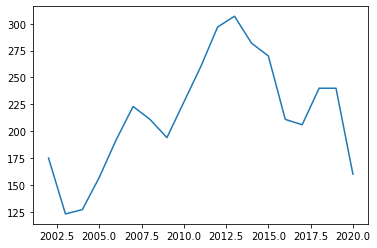

FIPS:	 1019


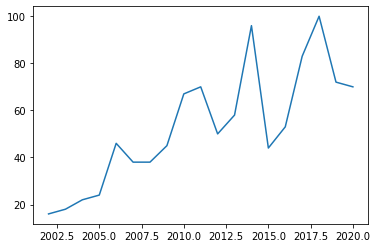

FIPS:	 1021


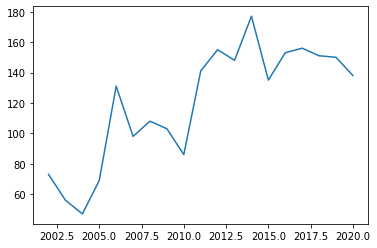

FIPS:	 1023


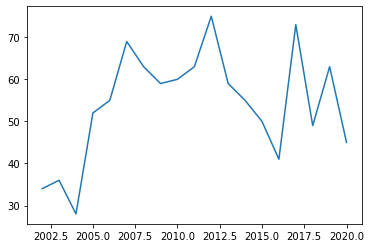

FIPS:	 1025


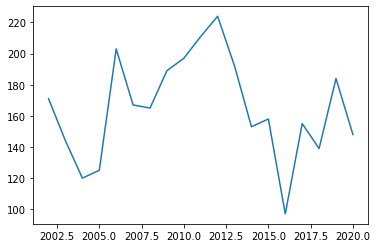

FIPS:	 1027


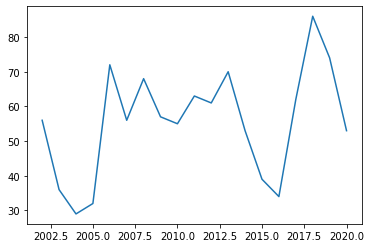

FIPS:	 1029


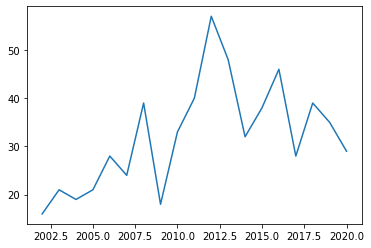

FIPS:	 1031


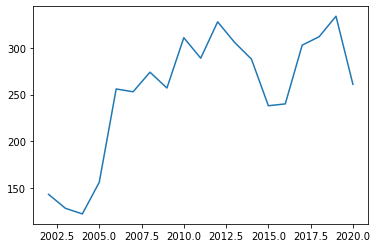

FIPS:	 1033


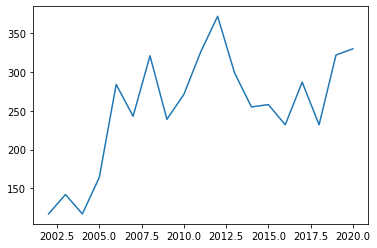

FIPS:	 1035


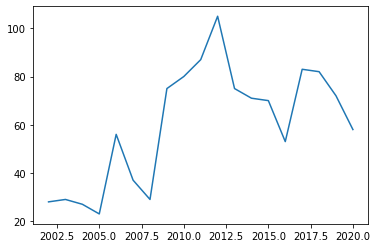

FIPS:	 1037


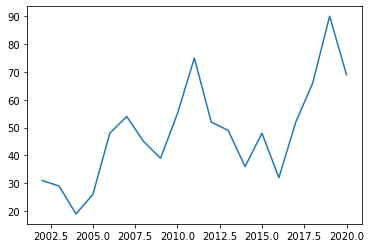

FIPS:	 1039


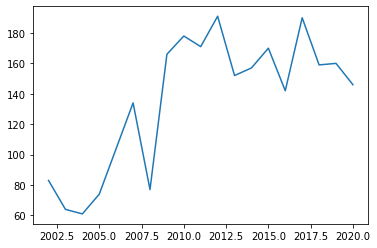

FIPS:	 1041


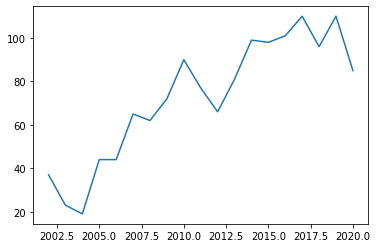

FIPS:	 1043


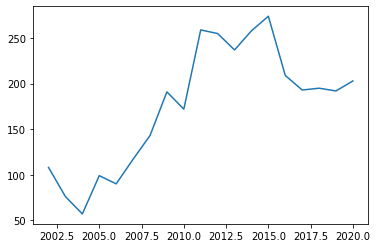

FIPS:	 1045


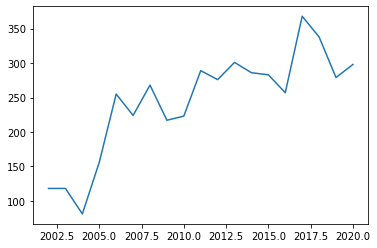

FIPS:	 1047


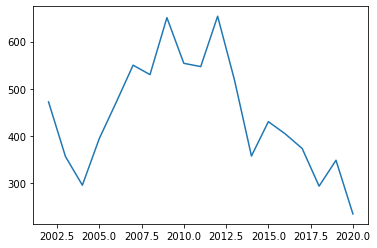

FIPS:	 1049


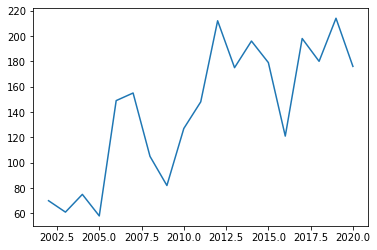

FIPS:	 1051


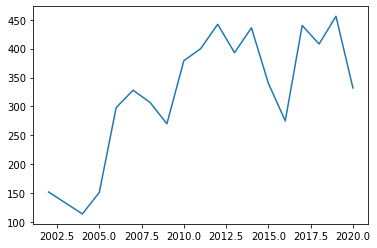

FIPS:	 1053


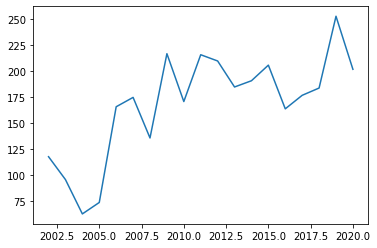

FIPS:	 1055


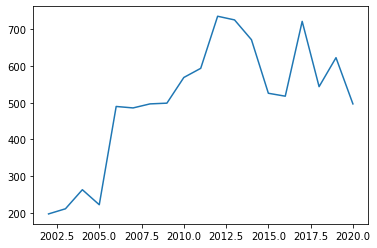

FIPS:	 1057


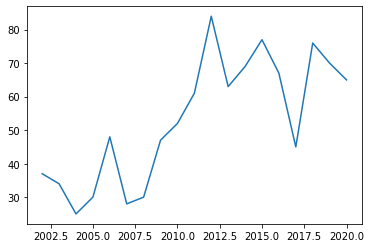

FIPS:	 1059


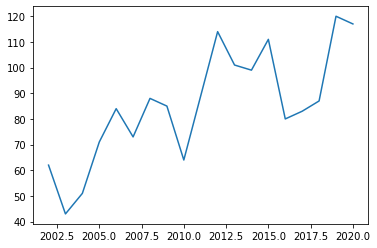

FIPS:	 1061


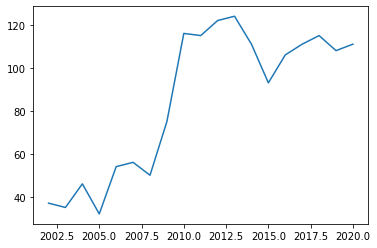

FIPS:	 1063


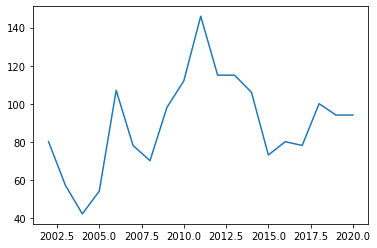

FIPS:	 1065


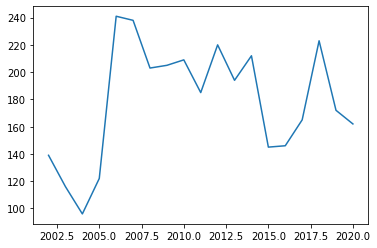

FIPS:	 1067


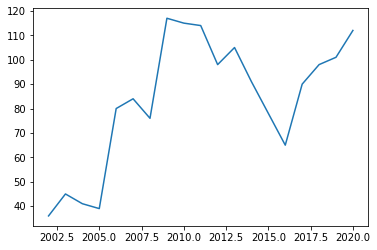

FIPS:	 1069


KeyboardInterrupt: 

In [44]:
import time
for cnt in pd.unique(df.fips):
    print("FIPS:\t",cnt)
    int_df = df[(df["year"] >=2002) & (df["fips"] == cnt)]
    plt.plot(int_df["year"],int_df["cases_chlamydia"])
    plt.show()
    time.sleep(5)

In [ ]:
## 1053, 1009, 1013, 1041

In [47]:
pred = []
for cnt in [1053, 1009, 1013, 1041]:
    print("FIPS:\t",cnt)
    int_df = df[(df["year"] >=2002) & (df["fips"] == cnt) & (df["year"]<=2019)]
    model = auto_arima(int_df["cases_chlamydia"], error_action='ignore', suppress_warnings=True)
        
    model.fit(int_df["cases_chlamydia"])
    
    pred.append(model.predict(n_periods = 1)[0])

#     plt.plot(int_df["year"],int_df["cases_chlamydia"])
#     plt.show()
#     time.sleep(5)
    

FIPS:	 1053
FIPS:	 1009
FIPS:	 1013
FIPS:	 1041


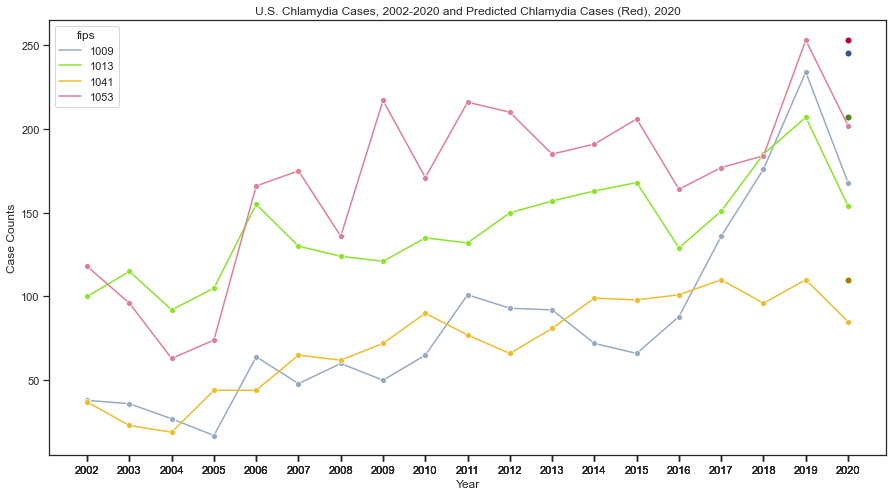

In [75]:
palette ={1053: "#dd8096", 1009: "#97abc0", 1013: "#8ae429", 1041: "#ecbd2c"}
df_plot = df[(df["year"] >=2002) & (df.fips.isin([1053, 1009, 1013, 1041]))]
# sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o", hue = "fips",palette =palette)
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_plot['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
# plt.legend(labels=["Actual Chlamydia Cases"])
# current_values = plt.gca().get_yticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, pred[0], marker='o', s=25, c="#bb012d")
plt.scatter(2020, pred[1], marker= 'o', s=25, c= "#2e5781")
plt.scatter(2020, pred[2], marker= 'o', s=25, c= "#4d7f17")
plt.scatter(2020, pred[3], marker= 'o', s=25, c= "#a57d00")
plt.savefig('../Output/PosterPresentation/ModelOutputs/county_arima_chlamydia_4.png',dpi=300)
plt.show()

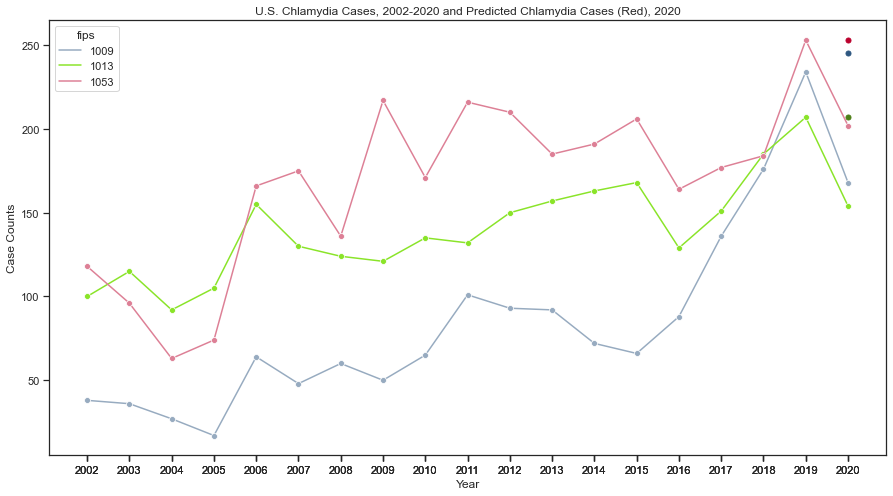

In [73]:
palette ={1053: "#dd8096", 1009: "#97abc0", 1013: "#8ae429"}
df_plot = df[(df["year"] >=2002) & (df.fips.isin([1053, 1009, 1013]))]
# sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o", hue = "fips",palette =palette)
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_plot['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
# plt.legend(labels=["Actual Chlamydia Cases"])
# current_values = plt.gca().get_yticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, pred[0], marker='o', s=25, c="#bb012d")
plt.scatter(2020, pred[1], marker= 'o', s=25, c= "#2e5781")
plt.scatter(2020, pred[2], marker= 'o', s=25, c= "#4d7f17")
# plt.scatter(2020, pred[3], marker= 'o', s=25, c= "#a57d00")
plt.savefig('../Output/PosterPresentation/ModelOutputs/county_arima_chlamydia_3.png',dpi=300)
plt.show()

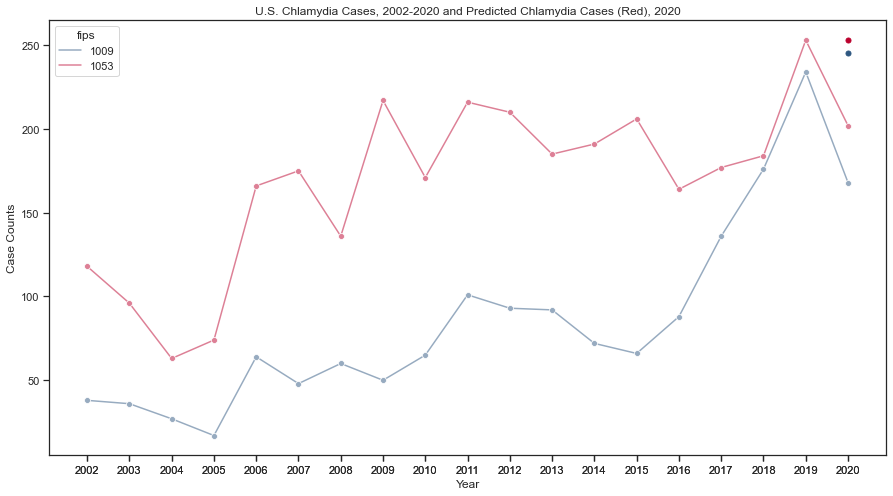

In [76]:
palette ={1053: "#dd8096", 1009: "#97abc0"}
df_plot = df[(df["year"] >=2002) & (df.fips.isin([1053, 1009]))]
# sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o", hue = "fips",palette =palette)
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_plot['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
# plt.legend(labels=["Actual Chlamydia Cases"])
# current_values = plt.gca().get_yticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, pred[0], marker='o', s=25, c="#bb012d")
plt.scatter(2020, pred[1], marker= 'o', s=25, c= "#2e5781")
# plt.scatter(2020, pred[2], marker= 'o', s=25, c= "#4d7f17")
# plt.scatter(2020, pred[3], marker= 'o', s=25, c= "#a57d00")
plt.savefig('../Output/PosterPresentation/ModelOutputs/county_arima_chlamydia_2.png',dpi=300)
plt.show()

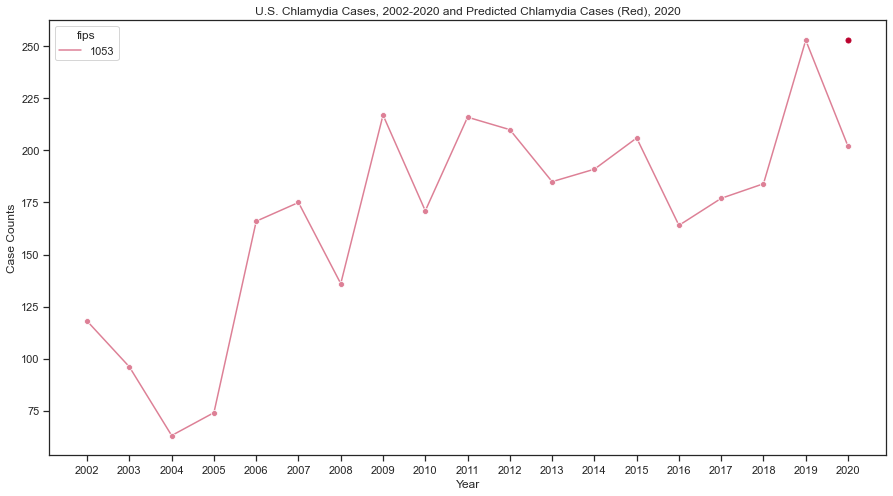

In [78]:
palette ={1053: "#dd8096"}
df_plot = df[(df["year"] >=2002) & (df.fips.isin([1053]))]
# sns.set_theme(style="ticks", palette=None)
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o", hue = "fips",palette =palette)
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_plot['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
# plt.legend(labels=["Actual Chlamydia Cases"])
# current_values = plt.gca().get_yticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, pred[0], marker='o', s=25, c="#bb012d")
# plt.scatter(2020, pred[1], marker= 'o', s=25, c= "#2e5781")
# plt.scatter(2020, pred[2], marker= 'o', s=25, c= "#4d7f17")
# plt.scatter(2020, pred[3], marker= 'o', s=25, c= "#a57d00")
plt.savefig('../Output/PosterPresentation/ModelOutputs/county_arima_chlamydia_1.png',dpi=300)
plt.show()